### Project Topic: Investigating the patterns of students' self-directed learning using "Learnbar" (學習吧) during summer vacation<br>
Data Used: Learnbar usage data from the Yilan Distance Learning Center (July 2024)<br>
https://docs.google.com/spreadsheets/d/1sb0iZHC-mDmk_ymu1Wus5wOmqVinRMNGCpk70vWaD6w/edit?gid=685914123#gid=685914123


### Data Import and Cleaning

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1sb0iZHC-mDmk_ymu1Wus5wOmqVinRMNGCpk70vWaD6w/edit?gid=685914123#gid=685914123')

In [ ]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('Sheet1').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,stuid,在線時間,本月素材總使用時間,課程名稱,本月瀏覽影片時間,影片加總時間,本月測驗時間,測驗加總時間,本月語音作業時間,語音作業加總時間,本月音檔時間,音檔加總時間,本月書籍瀏覽時間,書籍加總時間,本月課間教材時間,課間教材加總時間
0,152472,01 時 10 分 40 秒,,,,,,,,,,,,,,
1,145877,00 時 25 分 08 秒,,,,,,,,,,,,,,
2,152495,00 時 56 分 57 秒,,,,,,,,,,,,,,
3,152465,03 時 06 分 41 秒,00 時 46 分 07 秒,順安國中八升九暑期輔導,00 時 38 分 48 秒,00 時 38 分 48 秒,00 時 06 分 42 秒,00 時 06 分 42 秒,,,,,00 時 00 分 37 秒,00 時 00 分 37 秒,,
4,152477,00 時 02 分 34 秒,,,,,,,,,,,,,,


In [ ]:
# 查看dataframe中的資料型態
df.dtypes

,0
stuid,object
在線時間,object
本月素材總使用時間,object
課程名稱,object
本月瀏覽影片時間,object
影片加總時間,object
本月測驗時間,object
測驗加總時間,object
本月語音作業時間,object
語音作業加總時間,object


In [ ]:
# 把時間變成int 並且用秒數表示
import re

def time_to_seconds(time_str):
    # 預設 0
    h, m, s = 0, 0, 0
    if pd.isnull(time_str):
        return 0
    # 擷取時間數字
    h_match = re.search(r'(\d+)\s*時', time_str)
    m_match = re.search(r'(\d+)\s*分', time_str)
    s_match = re.search(r'(\d+)\s*秒', time_str)

    if h_match:
        h = int(h_match.group(1))
    if m_match:
        m = int(m_match.group(1))
    if s_match:
        s = int(s_match.group(1))

    return h * 3600 + m * 60 + s

# 套用函數
df['在線時間'] = df['在線時間'].apply(time_to_seconds)
df['本月素材總使用時間'] = df['本月素材總使用時間'].apply(time_to_seconds)
df['本月瀏覽影片時間'] = df['本月瀏覽影片時間'].apply(time_to_seconds)
df['影片加總時間'] = df['影片加總時間'].apply(time_to_seconds)
df['本月測驗時間'] = df['本月測驗時間'].apply(time_to_seconds)
df['測驗加總時間'] = df['測驗加總時間'].apply(time_to_seconds)
df['本月語音作業時間'] = df['本月語音作業時間'].apply(time_to_seconds)
df['語音作業加總時間'] = df['語音作業加總時間'].apply(time_to_seconds)
df['本月音檔時間'] = df['本月音檔時間'].apply(time_to_seconds)
df['音檔加總時間'] = df['音檔加總時間'].apply(time_to_seconds)
df['本月書籍瀏覽時間'] = df['本月書籍瀏覽時間'].apply(time_to_seconds)
df['書籍加總時間'] = df['書籍加總時間'].apply(time_to_seconds)
df['本月課間教材時間'] = df['本月課間教材時間'].apply(time_to_seconds)
df['課間教材加總時間'] = df['課間教材加總時間'].apply(time_to_seconds)

In [ ]:
# 查看修正後的dataframe中的資料型態
df.dtypes

,0
stuid,object
在線時間,int64
本月素材總使用時間,int64
課程名稱,object
本月瀏覽影片時間,int64
影片加總時間,int64
本月測驗時間,int64
測驗加總時間,int64
本月語音作業時間,int64
語音作業加總時間,int64


In [ ]:
df.head()

,stuid,在線時間,本月素材總使用時間,課程名稱,本月瀏覽影片時間,影片加總時間,本月測驗時間,測驗加總時間,本月語音作業時間,語音作業加總時間,本月音檔時間,音檔加總時間,本月書籍瀏覽時間,書籍加總時間,本月課間教材時間,課間教材加總時間
0,152472,4240,0,,0,0,0,0,0,0,0,0,0,0,0,0
1,145877,1508,0,,0,0,0,0,0,0,0,0,0,0,0,0
2,152495,3417,0,,0,0,0,0,0,0,0,0,0,0,0,0
3,152465,11201,2767,順安國中八升九暑期輔導,2328,2328,402,402,0,0,0,0,37,37,0,0
4,152477,154,0,,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,在線時間,本月素材總使用時間,本月瀏覽影片時間,影片加總時間,本月測驗時間,測驗加總時間,本月語音作業時間,語音作業加總時間,本月音檔時間,音檔加總時間,本月書籍瀏覽時間,書籍加總時間,本月課間教材時間,課間教材加總時間
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.0,876.0
mean,7100.650685,923.609589,421.539954,442.061644,91.565068,109.574201,134.444064,204.280822,5.481735,5.536530,110.965753,162.156393,0.0,0.0
std,21826.969776,1750.574897,1206.381486,1217.709360,287.480876,417.083778,554.564985,708.843071,136.335027,136.337798,521.813636,685.406657,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,297.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1965.500000,114.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,6369.500000,982.250000,252.750000,346.500000,0.000000,0.000000,5.000000,15.000000,0.000000,0.000000,17.000000,27.000000,0.0,0.0
max,487430.000000,14973.000000,12669.000000,12669.000000,3943.000000,8707.000000,5612.000000,5612.000000,4006.000000,4006.000000,7016.000000,7555.000000,0.0,0.0


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-06-04 02:57:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.127.113, 108.177.127.139, 108.177.127.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-04 02:57:07--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.127.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-06-04 

### Question 1. Is there a positive correlation between students' total learning engagement time and their online time?

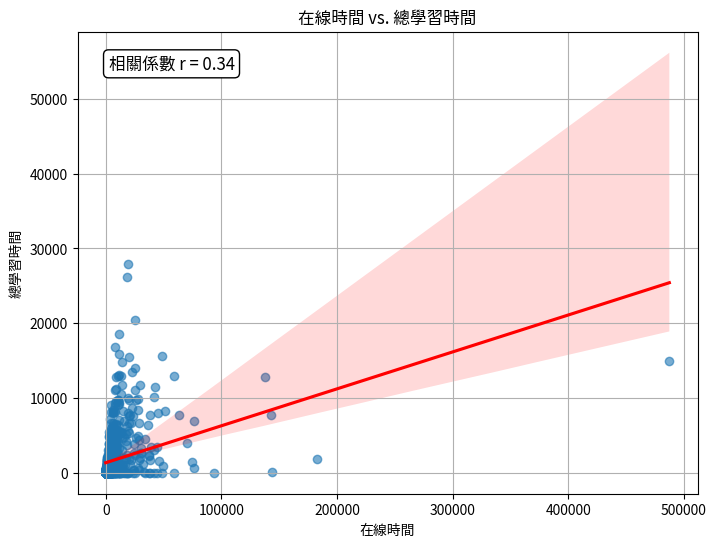

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 計算總學習時間
df['總學習時間'] = df[['本月素材總使用時間', '本月瀏覽影片時間', '本月測驗時間',
                     '本月語音作業時間', '本月音檔時間', '本月書籍瀏覽時間', '本月課間教材時間']].sum(axis=1)



# 計算皮爾森相關係數
corr, _ = pearsonr(df['在線時間'], df['總學習時間'])

# 繪圖
plt.figure(figsize=(8,6))
sns.regplot(
    x='在線時間',
    y='總學習時間',
    data=df,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}  # 回歸線為紅色
)

# 顯示相關係數
plt.text(0.05, 0.95, f'相關係數 r = {corr:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", fc="w"))

plt.xlabel('在線時間')
plt.ylabel('總學習時間')
plt.title('在線時間 vs. 總學習時間')
plt.grid(True)
plt.show()

As shown in the figure above, many students have long online times but very short actual learning times. These extreme data points will be removed before further analysis.

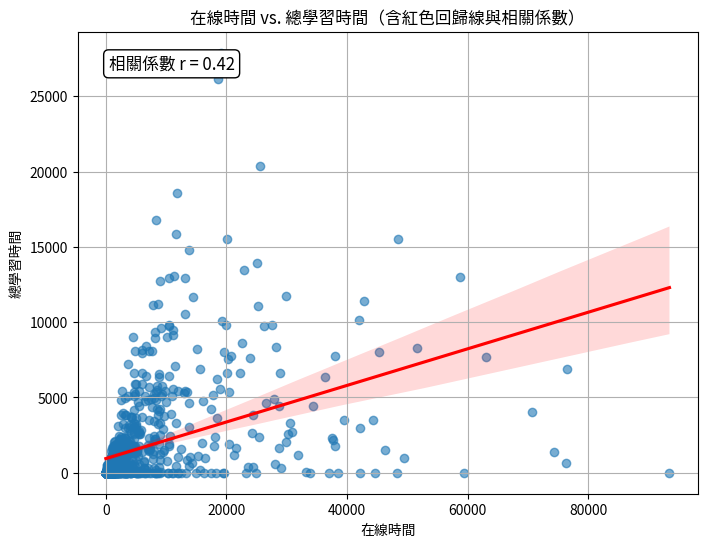

In [ ]:
# 移除極端值
df['總學習時間'] = df[['本月素材總使用時間', '本月瀏覽影片時間', '本月測驗時間',
                     '本月語音作業時間', '本月音檔時間', '本月書籍瀏覽時間', '本月課間教材時間']].sum(axis=1)

# 篩選極端值（如有需要）
df_filtered = df[df['在線時間'] <= 100000]

# 計算皮爾森相關係數
corr, _ = pearsonr(df_filtered['在線時間'], df_filtered['總學習時間'])

# 繪圖
plt.figure(figsize=(8,6))
sns.regplot(
    x='在線時間',
    y='總學習時間',
    data=df_filtered,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}  # 回歸線為紅色
)

# 顯示相關係數
plt.text(0.05, 0.95, f'相關係數 r = {corr:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", fc="w"))

plt.xlabel('在線時間')
plt.ylabel('總學習時間')
plt.title('在線時間 vs. 總學習時間（含紅色回歸線與相關係數）')
plt.grid(True)
plt.show()


Based on the data analysis, the ***correlation coefficient between online time and total learning time is 0.42***, indicating a ***moderate positive correlation*** between the two. As students' online time increases, their total learning time tends to rise as well, though this relationship is not particularly strong. Possible reasons include:<br>

1. Some students have long online times but low actual learning engagement (videos, quizzes, materials, etc.), suggesting they may simply be idle online.<br>

2. Conversely, some students may have short online times yet complete a large volume of learning activities in a focused manner, demonstrating highly efficient learning behavior.<br>

***Conclusion: While online time can reflect students' attendance, it does not fully represent their level of learning engagement.***

### Question 2. Time Spent by Students on Each Learning Activity on the Platform

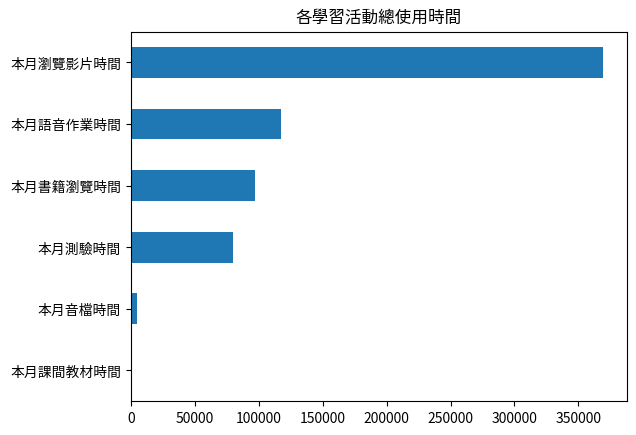

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

activity_cols = ['本月瀏覽影片時間', '本月測驗時間', '本月語音作業時間',
                 '本月音檔時間', '本月書籍瀏覽時間', '本月課間教材時間']

# 長條圖：總和比較
df[activity_cols].sum().sort_values().plot(kind='barh', title='各學習活動總使用時間')

plt.show()


The figure above displays the total time students spent on each type of learning activity. As shown, "Monthly Video Browsing Time" accounts for the largest portion, far exceeding other learning activities, indicating that students primarily learn through videos. This is followed by "Voice Assignment Time," "Book Browsing Time," and "Quiz Time," which also account for a notable share of learning time, suggesting that students engage in diverse learning approaches. However, "Audio File Time" and "In-class Material Time" show relatively low usage, which may indicate that these resources are accessed infrequently or that less content is available in these categories. This warrants further investigation into whether additional guidance or resource allocation for these activities is needed in order to promote a more balanced learning model.

### Question 3. Is there a certain correlation among different learning activities?

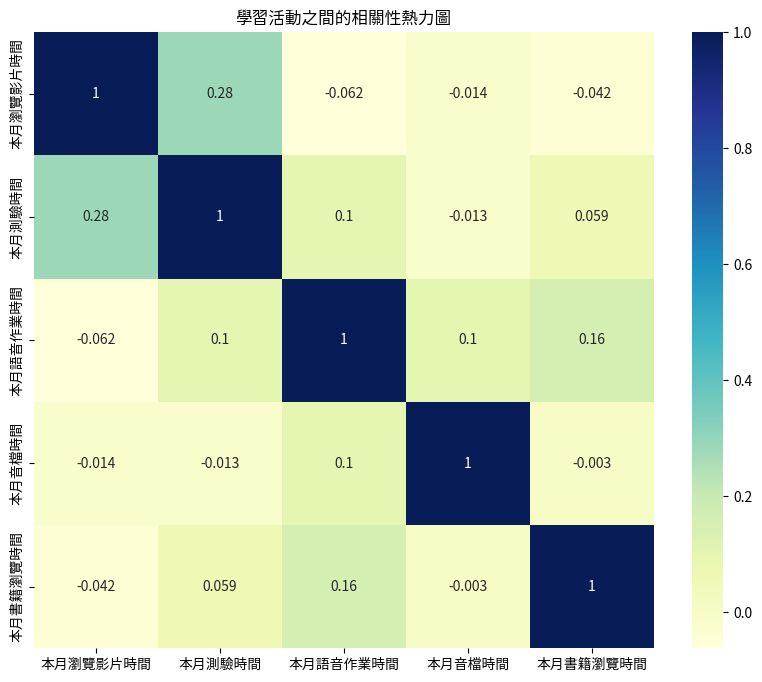

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

activity_cols = ['本月瀏覽影片時間', '本月測驗時間',
                 '本月語音作業時間', '本月音檔時間', '本月書籍瀏覽時間']

corr_matrix = df[activity_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('學習活動之間的相關性熱力圖')
plt.show()

Overall, the correlations among the various learning activity times are ***generally low***, suggesting that students' time investments across different learning activities are not strongly related to one another, which may reflect a high degree of personalization and variation in learning behavior.<br>

***Monthly Quiz Time vs. Monthly Video Browsing Time: Correlation Coefficient 0.23***<br>
The two show a weak positive correlation, indicating that some students may take quizzes after watching videos, but this behavior is not particularly common and considerable individual variation still exists.<br>

***Monthly Book Browsing Time vs. Monthly Voice Assignment Time: Correlation Coefficient 0.13***<br>
This also represents a very weak positive correlation, suggesting that some students may engage in verbal output (e.g., reading aloud, oral practice) after reading, though the overall pattern is not significant.<br>

***Monthly Video Browsing Time vs. Monthly Voice Assignment Time: Correlation Coefficient -0.12***<br>
This reflects a very weak negative correlation, indicating that students who prefer video-based learning may engage less in voice assignments, suggesting a slightly mutually exclusive tendency between these two learning styles.<br>

Conclusion: These findings can help educational platforms understand that students do not automatically transition from one activity to another when planning learning tasks. If the goal is to enhance comprehensive learning outcomes, it may be necessary to ***design more guided task structures*** (e.g., quizzes or voice assignments following video viewing) to encourage multi-faceted participation.

### Question 4. Does the distribution of learning activities differ across subjects?

In [ ]:
# 列出所有唯一的課程名稱
unique_courses = df['課程名稱'].unique()

# 顯示所有課程名稱
print("課程名稱一覽（共", len(unique_courses), "門課）:")
for course in unique_courses:
    print(course)


課程名稱一覽（共 114 門課）:

順安國中八升九暑期輔導
學習吧－節慶英文故事館（暑假篇）
901暑假作業：基本單字發音練習
八年級
111 六年義班 社會教室
超哥競賽社團
801下期末課程
我的日本學生高崎小姐
七年級
閒話講等路
Class 902
口說錄音704
112_暑假英語閱讀_505
知穎老師-112年陶笛
大家說英語【空中英語教室授權】
2023線上寒假任務（全年級適用）
中華701（112下）
G4【Dino on the Go! 4】
112 學年 六年級下學期
Class 801
成語故事 - 從典故到生活
水保小教室- 呼叫水保隊長
112_暑假英語閱讀_502
(109學年)翰林版─國小國語【一上】
水土保持好好玩
國語課文朗讀
英語初級閱讀【博幼基金會授權】
成語故事 - 典故由來3
環境教育113
【母親節活動】給媽媽的情書
(110學年)康軒版─國小國語【一下(第二冊)】
112學年(下) 新生401
2024【四升五】 英語暑假練習
(110學年)翰林版─國小國語【三下】
401下學期電腦課
閱讀寫作齊步走【小壁虎老師】
111學年度宜蘭瘋學習活動11/25~1/20 (英語課程) 
六年級反毒學習單
【112 學年度】五結國小暑假任務 Here we go (四年級→五年級)  
【雙語自然】國小三上
湖山四忠-成語故事 - 從典故到生活
※ Here We Go 3 (四年級下學期🤗 溫弟老師） 
【一眼看天下】國際新聞要覽（更新結束）
112學年713班
八年級定期二英語多元評量錄音
國語文學習扶助（三年級）
113y ※ Here We Go 1 (三年級上學期🤗 溫弟老師）
112學年708班
成語故事 - 典故由來１
Dino 8 Unit 1 Where were you yesterday?
112_509 英文_HWG6
112_507 英文_HWG6
112_508 英文_HWG6
國語文教材（五年級）學習扶助教材
309閩南語
AI程式課程（創造栗）
2024Grade 3 Summer Review Fun!
這週世界發生了什麼？（TVBS 合作課程）
503成功英語
國語文教材（四年級）學習扶助教材
112學年(下) 新生304
112學年(下) 新生302
112學年(下) 新生303
(109學年

In [ ]:
import pandas as pd

# 假設你的課程名稱列表如下

course_names = [
    "順安國中八升九暑期輔導",
    "學習吧－節慶英文故事館（暑假篇）",
    "901暑假作業：基本單字發音練習",
    "八年級",
    "111 六年義班 社會教室",
    "超哥競賽社團",
    "801下期末課程",
    "我的日本學生高崎小姐",
    "七年級",
    "閒話講等路",
    "Class 902",
    "口說錄音704",
    "112_暑假英語閱讀_505",
    "知穎老師-112年陶笛",
    "大家說英語【空中英語教室授權】",
    "2023線上寒假任務（全年級適用）",
    "中華701（112下）",
    "G4【Dino on the Go! 4】",
    "112 學年 六年級下學期",
    "Class 801",
    "成語故事 - 從典故到生活",
    "水保小教室- 呼叫水保隊長",
    "112_暑假英語閱讀_502",
    "(109學年)翰林版─國小國語【一上】",
    "水土保持好好玩",
    "國語課文朗讀",
    "英語初級閱讀【博幼基金會授權】",
    "成語故事 - 典故由來3",
    "環境教育113",
    "【母親節活動】給媽媽的情書",
    "(110學年)康軒版─國小國語【一下(第二冊)】",
    "112學年(下) 新生401",
    "2024【四升五】 英語暑假練習",
    "(110學年)翰林版─國小國語【三下】",
    "401下學期電腦課",
    "閱讀寫作齊步走【小壁虎老師】",
    "111學年度宜蘭瘋學習活動11/25~1/20 (英語課程)",
    "六年級反毒學習單",
    "【112 學年度】五結國小暑假任務 Here we go (四年級→五年級)",
    "【雙語自然】國小三上",
    "湖山四忠-成語故事 - 從典故到生活",
    "※ Here We Go 3 (四年級下學期🤗 溫弟老師）",
    "【一眼看天下】國際新聞要覽（更新結束）",
    "112學年713班",
    "八年級定期二英語多元評量錄音",
    "國語文學習扶助（三年級）",
    "113y ※ Here We Go 1 (三年級上學期🤗 溫弟老師）",
    "112學年708班",
    "成語故事 - 典故由來１",
    "Dino 8 Unit 1 Where were you yesterday?",
    "112_509 英文_HWG6",
    "112_507 英文_HWG6",
    "112_508 英文_HWG6",
    "國語文教材（五年級）學習扶助教材",
    "309閩南語",
    "AI程式課程（創造栗）",
    "2024Grade 3 Summer Review Fun!",
    "這週世界發生了什麼？（TVBS 合作課程）",
    "503成功英語",
    "國語文教材（四年級）學習扶助教材",
    "112學年(下) 新生304",
    "112學年(下) 新生302",
    "112學年(下) 新生303",
    "(109學年)翰林版─國小數學【一下】",
    "三孝自然",
    "【筆墨小寫手】寫作課程（文章授權：聯合報系） - 複製",
    "唐詩精選（五言、七言絕句）",
    "五忠暑期作業",
    "唐詩朗誦大挑戰",
    "學習吧－節慶英文故事館",
    "全國語文競賽-閩南語朗讀",
    "生活中常見的英語單字",
    "小壁虎老師的 \"閱讀認證\"",
    "學習扶助教材～教師教學專用課程（四年級）",
    "113.07.26 Canva結合雙平臺 -  學習單製作好簡單",
    "110四下社會",
    "「做伙來」讀課文",
    "Firefly AI 人工智慧創建圖像",
    "WW6_期末英文學習",
    "112_暑假英語閱讀_504",
    "112_暑假英語閱讀_506",
    "112_暑假英語閱讀_503",
    "112_暑假英語閱讀_501",
    "110一年級雙語健體",
    "112_309 英文_WW2",
    "你不可不知的「語文知識」",
    "111學年度宜蘭瘋學習活動11/25~1/20 (國語課程-成語故事)",
    "112_307 英文_WW2",
    "唐詩",
    "學習扶助教材～教師教學專用課程（四年級） - 複製",
    "國語文教材（一年級）學習扶助教材",
    "2024 summer camp 學習吧",
    "節慶英語故事－聽故事學英語",
    "四年級圖書館課",
    "AI 陪你讀古典文學（搶先看！）",
    "112_308 英文_WW2",
    "認識英文字母 - 教學影片與學習單",
    "113 三年級 暑期學習扶助",
    "112利澤五年孝班英文閱讀課",
    "國語文教材（四年級）學習扶助教材 - 複製",
    "（110學年）康軒版—國小社會【六上】",
    "【二愛來上課】112學年度下學期~🤗 溫弟老師~",
    "112學年04學季 成語故事 - 從典故到生活",
    "112學年高一上英文重補修",
    "出發吧，神獸動物園之旅",
    "三孝",
    "3A English三忠【英語】",
    "113 暑期育樂營-數位寫作好好玩",
    "文化資產好簡單—從生活中看見文化資產",
    "🏆112下學期-新北市國小【高年級】學習扶助自我挑戰超能賽",
    "學習吧國際大百科",
    "水保小教室- 迷走仙境plus 召喚山神",
    "國語文教材（二年級）學習扶助教材"
]


# 關鍵字對應科目分類
subject_keywords = {
    '國語': ['國語', '語文', '唐詩', '成語', '寫作', '朗讀', '閱讀認證','文學'],
    '英語': ['英語', 'English', '英文', 'Dino', 'WW', 'Here We Go', '單字', 'Class', '口說','Grade'],
    '數學': ['數學'],
    '社會': ['社會','文化資產'],
    '自然': ['自然', '科學', '水保', '環境', '水土']
}

# 分類函數
def classify_subject(course_name):
    for subject, keywords in subject_keywords.items():
        if any(keyword in course_name for keyword in keywords):
            return subject
    return '其他'

# 建立 DataFrame 並分類
df_courses = pd.DataFrame({'課程名稱': course_names})
df_courses['科目分類'] = df_courses['課程名稱'].apply(classify_subject)

# 顯示結果
df_courses


,課程名稱,科目分類
0,順安國中八升九暑期輔導,其他
1,學習吧－節慶英文故事館（暑假篇）,英語
2,901暑假作業：基本單字發音練習,英語
3,八年級,其他
4,111 六年義班 社會教室,社會
...,...,...
108,文化資產好簡單—從生活中看見文化資產,社會
109,🏆112下學期-新北市國小【高年級】學習扶助自我挑戰超能賽,其他
110,學習吧國際大百科,其他
111,水保小教室- 迷走仙境plus 召喚山神,自然


In [ ]:
# 合併分類資訊
df_merged = pd.merge(df, df_courses, on='課程名稱', how='left')
# 缺少分類的標為「其他」
df_merged['科目分類'].fillna('其他', inplace=True)
df_merged

<ipython-input-38-537a56c18660>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['科目分類'].fillna('其他', inplace=True)


,stuid,在線時間,本月素材總使用時間,課程名稱,本月瀏覽影片時間,影片加總時間,本月測驗時間,測驗加總時間,本月語音作業時間,語音作業加總時間,本月音檔時間,音檔加總時間,本月書籍瀏覽時間,書籍加總時間,本月課間教材時間,課間教材加總時間,總學習時間,學習分群,科目分類
0,152472,4240,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,其他
1,145877,1508,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,其他
2,152495,3417,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,其他
3,152465,11201,2767,順安國中八升九暑期輔導,2328,2328,402,402,0,0,0,0,37,37,0,0,5534,2,其他
4,152477,154,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,其他
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,175296,10494,4863,國語文教材（四年級）學習扶助教材,0,0,0,0,4803,4803,0,0,60,60,0,0,9726,0,國語
872,177136,289,225,學習吧－節慶英文故事館（暑假篇）,123,123,102,102,0,0,0,0,0,0,0,0,450,0,英語
873,Null,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,其他
874,183361,934,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,其他


In [ ]:
# 選擇你想分析的時間欄位
time_columns = [
    '本月瀏覽影片時間',
    '本月測驗時間',
    '本月語音作業時間',
    '本月音檔時間',
    '本月書籍瀏覽時間',
    '本月課間教材時間'
]

# 計算每個科目的各工具平均使用時間
subject_tool_time = df_merged.groupby('科目分類')[time_columns].mean().reset_index()


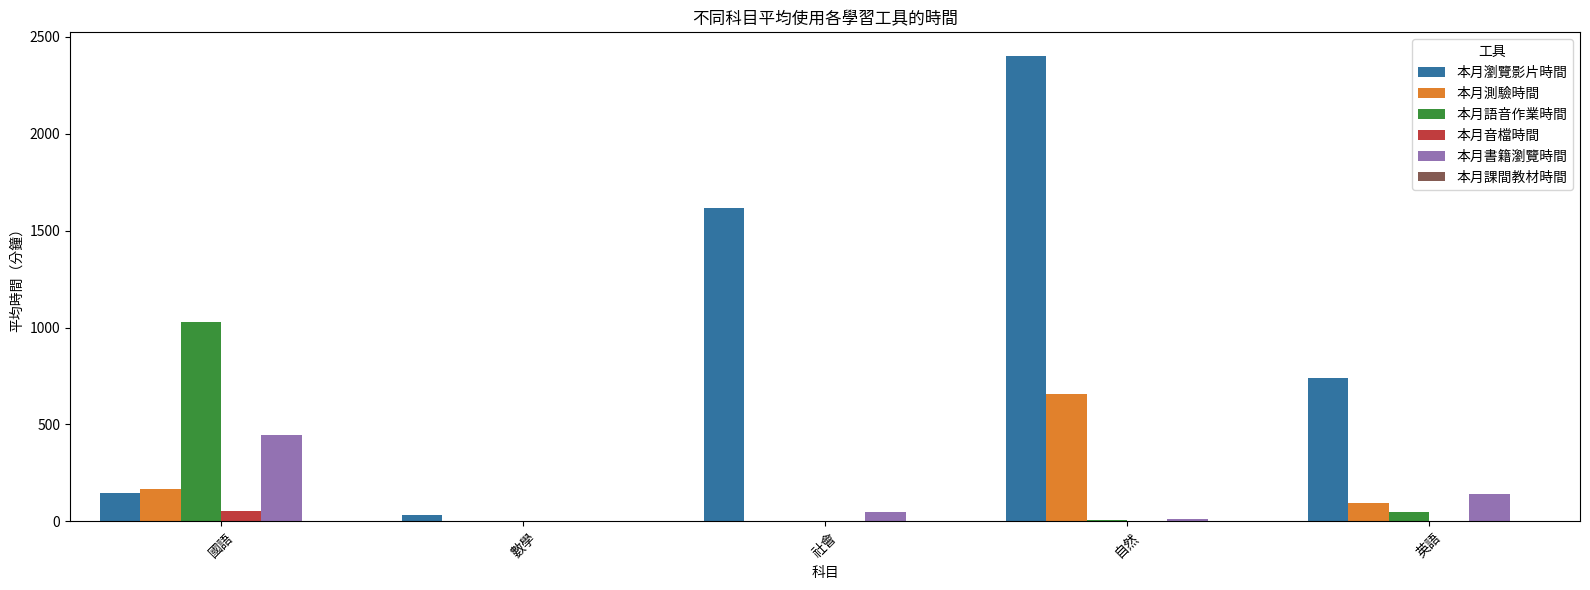

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 只保留「科目分類」不是「其他」的資料
df_filtered = subject_tool_time[subject_tool_time['科目分類'] != '其他']

# melt 轉長格式
df_melted = df_filtered.melt(id_vars='科目分類', var_name='工具', value_name='平均使用時間')

# 畫條形圖
plt.figure(figsize=(16, 6))
sns.barplot(data=df_melted, x='科目分類', y='平均使用時間', hue='工具')

plt.title("不同科目平均使用各學習工具的時間")
plt.xlabel("科目")
plt.ylabel("平均時間（分鐘）")
plt.xticks(rotation=45)
plt.legend(title='工具')
plt.tight_layout()
plt.show()


From the charts, notable differences can be observed in the time distribution of learning tool usage across subjects:

- Students invest a considerable amount of time browsing Science videos, likely because videos help students understand abstract or complex scientific concepts.
- In Chinese Language, the average time spent on voice assignments is significantly higher than in other subjects, reflecting the emphasis on oral practice in language learning, with voice assignments serving as a means of feedback and correction.
- Book browsing time is also relatively high in both Chinese Language and English, possibly due to the extensive reading demands of language learning.
- Quiz time also varies by subject; for example, the average quiz time in Science exceeds 800 minutes, indicating that students need to spend more time on self-assessment and knowledge consolidation.
- Social Studies shows overall low usage across learning tools, suggesting that learning activities are less concentrated on these tools, which may also be influenced by sample size and curriculum design.

Overall, the degree to which different subjects rely on various learning tools varies significantly, reflecting the diversity in instructional design and student learning behavior. These findings can serve as a reference for educational resource allocation and platform feature optimization.

In [ ]:
features = ['影片加總時間','測驗加總時間', '語音作業加總時間', '音檔加總時間',
            '書籍加總時間', '課間教材加總時間']

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[features].fillna(0)  # 缺失值處理（先用 0 補）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


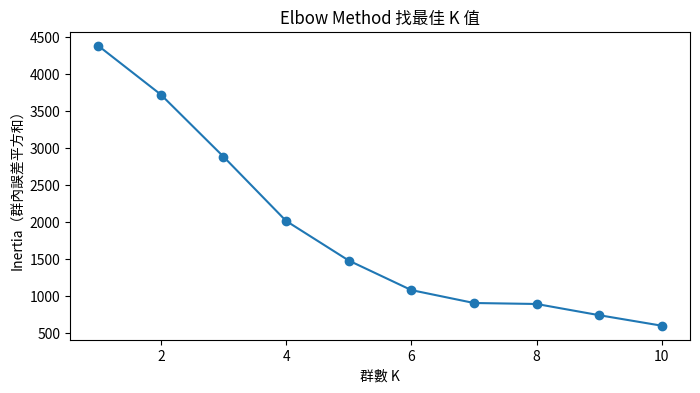

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('群數 K')
plt.ylabel('Inertia（群內誤差平方和）')
plt.title('Elbow Method 找最佳 K 值')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary

,影片加總時間,測驗加總時間,語音作業加總時間,音檔加總時間,書籍加總時間,課間教材加總時間
cluster,,,,,,
0,163.227632,76.861842,58.686842,6.356579,59.713158,0.0
1,4284.440678,244.915254,41.779661,0.000000,39.779661,0.0
2,182.649123,405.649123,2313.736842,0.333333,1654.736842,0.0


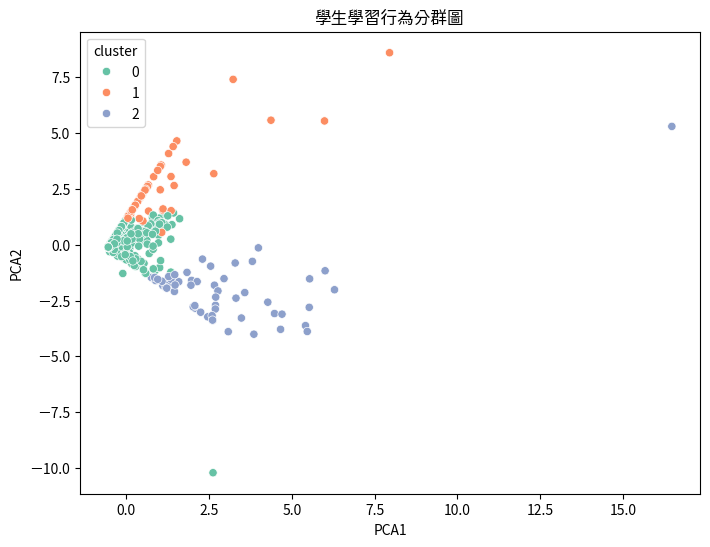

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='Set2')
plt.title('學生學習行為分群圖')
plt.show()
